# 1. Preparation

### Importing libraries

In [2]:
import numpy as np 
import keras
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from keras.utils import np_utils 
from keras import backend as K 
import pandas as pd
from sklearn.model_selection import train_test_split


### Importing the data from dict.csv

In [3]:
data = pd.read_csv("dict.csv", header = None, names = ["Angles", "XY"])

### Defining the dataset size

In [4]:
data.head(10)

,Angles,XY
0,"(0.3514, -0.2365, -0.1968, -0.1949, -0.0863)",[ 3.3793 -1.2376 0.25 ]
1,"(0.3094, 0.4925, 0.4629, -0.1565, 0.3523)",[2.061 2.5772 0.25 ]
2,"(0.1157, -0.4121, 0.0578, 0.3772, 0.428)",[3.4905 0.9227 0.25 ]
3,"(0.339, -0.1037, -0.2424, 0.2975, 0.0062)",[ 3.6355 -0.1753 0.25 ]
4,"(0.2312, -0.4059, -0.0095, 0.4335, 0.4635)",[3.4413 0.9989 0.25 ]
5,"(-0.4137, 0.2597, 0.4613, -0.3463, -0.0408)",[3.4743 0.8149 0.25 ]
6,"(0.4124, 0.2546, -0.2049, -0.0035, 0.2845)",[3.3598 1.3618 0.25 ]
7,"(0.273, -0.0413, -0.2412, 0.2292, -0.4313)",[ 3.2972 -1.5038 0.25 ]
8,"(-0.4171, -0.0979, -0.3272, -0.2378, 0.1323)",[ 3.3774 -0.8196 0.25 ]
9,"(-0.165, 0.3236, -0.2667, -0.0649, -0.0461)",[3.663 0.0381 0.25 ]


### Labeling & Splitting

In [5]:
train = data['Angles'].to_numpy()
labels = data['XY'].to_numpy()

In [6]:
X = list()
Y = list()
for i in range(len(train)):
    labels[i] = labels[i].replace('   ', ' ')
    labels[i] = labels[i].replace('  ', ' ')
    labels[i] = labels[i].strip('[ ').strip(' ]')
    train[i] = train[i].strip('(').strip(')')
    result = [float(val) for val in train[i].split(',')]
    X.append(result)
    result = [float(val) for val in labels[i].split(' ')]
    Y.append(result)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(np.asarray(X), np.asarray(Y), test_size=0.80)

In [8]:
print(np.shape(X_train))
print(np.shape(y_train))
print(np.shape(X_test))
print(np.shape(y_test))

(200, 5)
(200, 3)
(801, 5)
(801, 3)


# 2. Different losses

### Mean Squared Logarithmic Error (MSLE)

In [9]:
model = Sequential()
model.add(Dense(10, input_dim =5, activation = 'relu'))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(2, activation='linear'))
model.compile(loss='mean_squared_logarithmic_error', optimizer=Adam(0.01))

X_train, X_test, y_train, y_test = train_test_split(np.asarray(X), np.asarray(Y), test_size=0.80)
y_train = np.delete(y_train, 2, 1)
y_test = np.delete(y_test, 2, 1)
model.fit(X_train, y_train, epochs = 10, verbose = 0)
scores_msle = model.evaluate(X_test, y_test, verbose=0) 
print("RMSE: %.5f" % (scores_msle))

RMSE: 0.01569


### Mean Absolute Error (MAE)

In [10]:
model = Sequential()
model.add(Dense(10, input_dim =5, activation = 'relu'))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(2, activation='linear'))
model.compile(loss='mean_absolute_error', optimizer=Adam(0.01))

X_train, X_test, y_train, y_test = train_test_split(np.asarray(X), np.asarray(Y), test_size=0.80)
y_train = np.delete(y_train, 2, 1)
y_test = np.delete(y_test, 2, 1)
model.fit(X_train, y_train, epochs = 10, verbose = 0)
scores_mae = model.evaluate(X_test, y_test, verbose=0) 
print("RMSE: %.5f" % (scores_mae))

RMSE: 0.21591


### Mean Squared Error (MSE)

In [11]:
model = Sequential()
model.add(Dense(10, input_dim =5, activation = 'relu'))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(2, activation='linear'))
model.compile(loss='mean_squared_error', optimizer=Adam(0.01))

X_train, X_test, y_train, y_test = train_test_split(np.asarray(X), np.asarray(Y), test_size=0.80)
y_train = np.delete(y_train, 2, 1)
y_test = np.delete(y_test, 2, 1)
model.fit(X_train, y_train, epochs = 10, verbose = 0)
scores_mse = model.evaluate(X_test, y_test, verbose=0) 
print("RMSE: %.5f" % (scores_mse))

RMSE: 0.15953


### Root-Mean-Square Error (RMSE)

In [12]:
def rmse(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true)))

model = Sequential()
model.add(Dense(10, input_dim =5, activation = 'relu'))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(2, activation='linear'))
model.compile(loss=rmse, optimizer=Adam(0.01))

X_train, X_test, y_train, y_test = train_test_split(np.asarray(X), np.asarray(Y), test_size=0.80)
y_train = np.delete(y_train, 2, 1)
y_test = np.delete(y_test, 2, 1)
model.fit(X_train, y_train, epochs = 10, verbose = 0)
scores = model.evaluate(X_test, y_test, verbose=0) 
print("RMSE: %.5f" % (scores))


RMSE: 0.26904


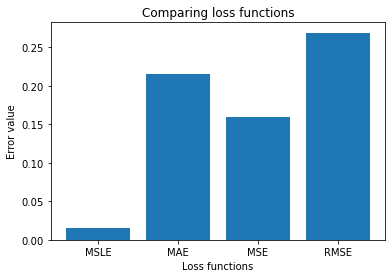

In [15]:
from matplotlib import pyplot as plt
plt.bar(['MSLE', 'MAE', 'MSE', 'RMSE'],[scores_msle, scores_mae, scores_mse, scores])
plt.xlabel("Loss functions")
plt.ylabel("Error value")
plt.title("Comparing loss functions")
plt.show()

Simply by looking at this bar-chart we can conclude that it is of the best choice to use MSLE for further improvements

# 3. Changing the number of layers

The logic is the same as before but added loops & changed number of layers

In [18]:
layers_scores = []

for i in range(1,50):        # number of layers: 50
    model = Sequential()
    lnum = 0
    model.add(Dense(10, input_dim =5, activation = 'relu'))
    lnum += 1
    
    for r in range(1,i):
        model.add(Dense(16, activation = 'relu'))
        lnum += 1
    model.add(Dense(2, activation='linear'))
    lnum += 1
    model.compile(loss='mean_squared_logarithmic_error', optimizer=Adam(0.01))

    X_train, X_test, y_train, y_test = train_test_split(np.asarray(X), np.asarray(Y), test_size=0.80)
    y_train = np.delete(y_train, 2, 1)
    y_test = np.delete(y_test, 2, 1)
    model.fit(X_train, y_train, epochs = 10, verbose = 0)
    score = model.evaluate(X_test, y_test, verbose=0) 
    
    print("Numer of layers: %d |   RMSE: %.5f" % (lnum, score))
    layers_scores.append(score)

Numer of layers: 2 |   RMSE: 0.02100
Numer of layers: 3 |   RMSE: 0.01238
Numer of layers: 4 |   RMSE: 0.00722
Numer of layers: 5 |   RMSE: 0.01288
Numer of layers: 6 |   RMSE: 1.08256
Numer of layers: 7 |   RMSE: 1.08195
Numer of layers: 8 |   RMSE: 0.12995
Numer of layers: 9 |   RMSE: 0.04482
Numer of layers: 10 |   RMSE: 0.12855
Numer of layers: 11 |   RMSE: 0.12963
Numer of layers: 12 |   RMSE: 0.05459
Numer of layers: 13 |   RMSE: 0.13046
Numer of layers: 14 |   RMSE: 0.07551
Numer of layers: 15 |   RMSE: 0.04996
Numer of layers: 16 |   RMSE: 0.08115
Numer of layers: 17 |   RMSE: 0.12859
Numer of layers: 18 |   RMSE: 0.12503
Numer of layers: 19 |   RMSE: 1.20656
Numer of layers: 20 |   RMSE: 0.08299
Numer of layers: 21 |   RMSE: 0.08271
Numer of layers: 22 |   RMSE: 0.08065
Numer of layers: 23 |   RMSE: 0.13164
Numer of layers: 24 |   RMSE: 0.12966
Numer of layers: 25 |   RMSE: 0.13151
Numer of layers: 26 |   RMSE: 0.12969
Numer of layers: 27 |   RMSE: 0.08576
Numer of layers: 28 

Instability begins at layer 5, so the number of layers to be used is 4.

# Optimizers test 

All optimizers are from tensorflow keras library. 

### Adamax 

In [20]:
from tensorflow.keras.optimizers import Adamax
model = Sequential()
model.add(Dense(10, input_dim =5, activation = 'relu'))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(2, activation='linear'))
model.compile(loss='mean_squared_logarithmic_error', optimizer=Adamax(0.01))

X_train, X_test, y_train, y_test = train_test_split(np.asarray(X), np.asarray(Y), test_size=0.80)
y_train = np.delete(y_train, 2, 1)
y_test = np.delete(y_test, 2, 1)
model.fit(X_train, y_train, epochs = 10, verbose = 0)
scores_adamax = model.evaluate(X_test, y_test, verbose=0) 
print("RMSE: %.5f" % (scores_adamax))

RMSE: 0.04108


### Ftrl

In [21]:
from tensorflow.keras.optimizers import Ftrl
model = Sequential()
model.add(Dense(10, input_dim =5, activation = 'relu'))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(2, activation='linear'))
model.compile(loss='mean_squared_logarithmic_error', optimizer=Ftrl(0.01))

X_train, X_test, y_train, y_test = train_test_split(np.asarray(X), np.asarray(Y), test_size=0.80)
y_train = np.delete(y_train, 2, 1)
y_test = np.delete(y_test, 2, 1)
model.fit(X_train, y_train, epochs = 10, verbose = 0)
scores_ftrl = model.evaluate(X_test, y_test, verbose=0) 
print("RMSE: %.5f" % (scores_ftrl))

RMSE: 1.17620


### Nadam

In [22]:
from tensorflow.keras.optimizers import Nadam
model = Sequential()
model.add(Dense(10, input_dim =5, activation = 'relu'))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(2, activation='linear'))
model.compile(loss='mean_squared_logarithmic_error', optimizer=Nadam(0.01))

X_train, X_test, y_train, y_test = train_test_split(np.asarray(X), np.asarray(Y), test_size=0.80)
y_train = np.delete(y_train, 2, 1)
y_test = np.delete(y_test, 2, 1)
model.fit(X_train, y_train, epochs = 10, verbose = 0)
scores_nadam = model.evaluate(X_test, y_test, verbose=0) 
print("RMSE: %.5f" % (scores_nadam))

RMSE: 0.01058


### RMSprop

In [23]:
from tensorflow.keras.optimizers import RMSprop
model = Sequential()
model.add(Dense(10, input_dim =5, activation = 'relu'))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(2, activation='linear'))
model.compile(loss='mean_squared_logarithmic_error', optimizer=RMSprop(0.01))

X_train, X_test, y_train, y_test = train_test_split(np.asarray(X), np.asarray(Y), test_size=0.80)
y_train = np.delete(y_train, 2, 1)
y_test = np.delete(y_test, 2, 1)
model.fit(X_train, y_train, epochs = 10, verbose = 0)
scores_rmsprop = model.evaluate(X_test, y_test, verbose=0) 
print("RMSE: %.5f" % (scores_rmsprop))

RMSE: 0.01747


### Adam

In [24]:
model = Sequential()
model.add(Dense(10, input_dim =5, activation = 'relu'))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(2, activation='linear'))
model.compile(loss='mean_squared_logarithmic_error', optimizer=Adam(0.01))

X_train, X_test, y_train, y_test = train_test_split(np.asarray(X), np.asarray(Y), test_size=0.80)
y_train = np.delete(y_train, 2, 1)
y_test = np.delete(y_test, 2, 1)
model.fit(X_train, y_train, epochs = 10, verbose = 0)
scores_adam = model.evaluate(X_test, y_test, verbose=0) 
print("RMSE: %.5f" % (scores_adam))

RMSE: 0.13047


Test results show that the best optimizer in my case is Nadam. 

### Results:
#### Old RMSE: 0.26904 & New RMSE: 0.01058